## City of Toronto Data Scraping and Clustering Assignment ~ Lauren Crowe

In [226]:
##minimal packages to install
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import scipy as sp


##import matplotlib libraries
!pip install matplotlib
import matplotlib.pyplot as plt


##importing packages for clustering
!pip install -U scikit-learn
from sklearn.cluster import KMeans 


##install maps for folium
!pip install folium
import folium

##install requests library
!pip install requests
import requests

!pip install beautifulsoup4
from bs4 import BeautifulSoup
import urllib.request

print("Install Successfully!!")



Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.21.2)
Install Successfully!!


In [227]:
##use request fctn to find wikipedia page and read url data
pc = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").read()

soup = BeautifulSoup(pc,'lxml') ##parse the html as a string

##find the postal code table and create it as object to be looped through to find column headers and rows

table = soup.table
table = soup.find("tbody")
column_names = []


##create new table df that will hold data from parsing

##new_table = pd.DataFrame(columns = column_names , index = [0])

##find postalcode wikitable headers

try:
    
    for row in soup.findAll ('table')[0].tbody.findAll('tr'):
        first_column = row.findAll('th')[0].contents
        second_column = row.findAll('th')[1].contents
        third_column = row.findAll('th')[2].contents
except IndexError: pass


##replace '\n' in third column
third_column = [c.replace('Neighbourhood\n', 'Neighborhood') for c in third_column]    
##print(first_column, second_column, third_column)



##find all table data cells and create a list of objects using a loop, strip the data

cells = []
rows = table.findAll('tr')
for row in rows:
    for cell in row.findAll("td"):
        cells.append(cell.get_text().strip())
##print(cells)

##create 1st column data with every x element from cells list
col_1_data = cells[::3]
##print(col_1_data)


col_2_data = cells[1::3]
##print(col_2_data)


col_3_data = cells[2::3]
##print(col_3_data)



##create new dataframe and add columns from list to it
new_table = pd.DataFrame(col_1_data)
new_table.head()
new_table['1'] = pd.Series(col_2_data, index = new_table.index)
##new_table.head()

new_table['2'] = pd.Series(col_3_data, index = new_table.index)
##new_table
##replace df headers with table headers created above
new_table.columns = ['Postal_Code','Borough','Neighborhood']
##new_table.head()


##clean and transform the data

##Only process cells with an assigned Borough, ignore cells with borough not assigned.
new_table = new_table[new_table.Borough != "Not assigned"]
##new_table.head()

##If cell has borough but not assigned neighborhood, use borough as the neighborhood  ##not complete yet
##new_table = new_table[new_table.Neighborhood == "Not assigned"] ###used to check to ensure code below runs to assign Borough to neighborhood
new_table.Neighborhood = np.where(new_table.Neighborhood == "Not assigned", new_table.Borough, new_table.Neighborhood)
##new_table.head()

##More than one neighborhood can exist in one postal code area, ex M5A listed twice w/ 2 neighborhoods. combine two rows into one with neighborhoods separated by a comma
##new_table['Neighborhood']= new_table[['Postal_Code','Borough','Neighborhood']].groupby(['Postal_Code','Borough'])['Neighborhood'].transform(lambda x: ', '.join(x)).reset_index(drop = True)
new_table = new_table.groupby(['Postal_Code','Borough'], as_index = 'False')['Neighborhood'].apply(lambda x: ', '.join(x)).reset_index()
##new_table = new_table[new_table.Postal_Code == "M5A"]  ##check to ensure correct aggregation of neighborhood

new_table.shape
new_table

,Postal_Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [228]:
##check shape of transformed new_table dataframe

new_table.shape

(103, 3)

In [229]:
##bring in postal and lat long data directly because package didn't work 

##read data from csv file
nh_data = pd.read_csv ("http://cocl.us/Geospatial_data")

##preview 1st 5 rows
nh_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [230]:
##merge the two dataframes together

df_merge = pd.merge(new_table, nh_data, how = 'outer', left_on = 'Postal_Code' , right_on = 'Postal Code')

df_merge

,Postal_Code,Borough,Neighborhood,Postal Code,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,M1G,Scarborough,Woburn,M1G,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848


In [231]:
##change df_merge for only neighborhoods containing toronto

##df_merge.filter(Borough='hello') 
df_merge = df_merge[df_merge['Borough'].str.contains('Toronto')]

##df_merge = df_merge[df_merge.Borough.apply(lambda x: 'a=Toronto' in x)]
df_merge

,Postal_Code,Borough,Neighborhood,Postal Code,Latitude,Longitude
37,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",M4K,43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",M4L,43.668999,-79.315572
43,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",M4T,43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",M4V,43.686412,-79.400049


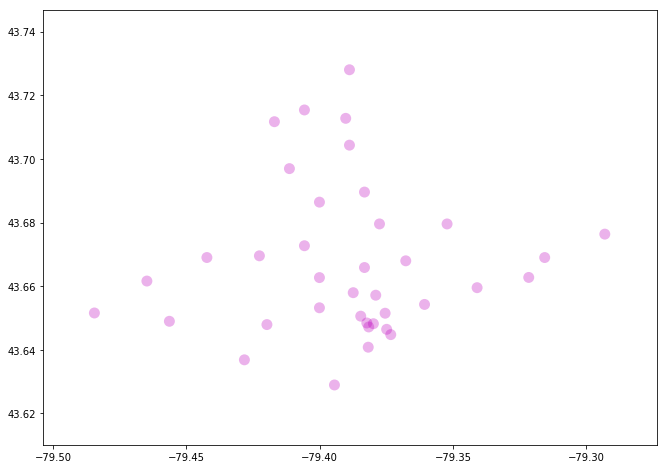

In [232]:
##create scatter plot of toronto lat long data to see cluster areas
fig, ax = plt.subplots(figsize=[11, 8])

ax.scatter(df_merge['Longitude'], df_merge['Latitude'], c='m', edgecolor='None', alpha=0.3, s=120)
plt.show()

In [233]:
###Create Folium map of Toronto to pick a neighborhood within Toronto to focus on area of Toronto to find coffee shops

df_merge = df_merge

map_toronto = folium.Map(location=[43.6532, -79.3832], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_merge['Latitude'], df_merge['Longitude'], df_merge['Borough'], df_merge['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Explore the Restaurants around Downtown Toronto area

Instructions from assignment:

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. Just make sure: to add enough Markdown cells to explain what you decided to do and to report any observations you make. to generate maps to visualize your neighborhoods and how they cluster together. Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

In [234]:
##define foursquare credentials

#Define four square credentials
CLIENT_ID = 'NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK' # your Foursquare ID
CLIENT_SECRET = 'IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK
CLIENT_SECRET:IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1


In [235]:
##rename dataframe

hf_df = df_merge
hf_df.head()


,Postal_Code,Borough,Neighborhood,Postal Code,Latitude,Longitude
37,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",M4K,43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",M4L,43.668999,-79.315572
43,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790


In [236]:
import json, requests
url = 'https://api.foursquare.com/v2/venues/explore'

params = dict(
  client_id= 'NZCDV121VZJ0VGBIFODVV4WA4GJ5JUSDOBZOQZ4RX0OGFBWK',
  client_secret= 'IBLGQL5QHJYM5EFJVIW1VPNKYTGJVYOO4FVIYSF5MZCCZZE1',
  v='20180323',
  ll='43.6532,-79.3832',
  query='restaurant',
  limit=100,
  radius = 500
)
resp = requests.get(url=url, params=params)
data = json.loads(resp.text)
data

{'meta': {'code': 200, 'requestId': '5d1f7576a19793003720f5ee'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'query': 'restaurant',
  'totalResults': 74,
  'suggestedBounds': {'ne': {'lat': 43.6577000045, 'lng': -79.37699210971401},
   'sw': {'lat': 43.648699995499996, 'lng': -79.389407890286}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '537773d1498e74a75bb75c1e',
       'name': 'Eggspectation Bell Trinity Square',
       'contact': {},
       'location': {'address': '483 Bay Street',
        'crossStreet': 'Albert Street',
        'lat': 43.653143

In [237]:
import json # library to handle JSON files
from pandas.io.json import json_normalize


In [238]:
## function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [239]:
##clean json and structure into pandas dataframe

venues = data['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Eggspectation Bell Trinity Square,Breakfast Spot,43.653144,-79.381980
1,Noodle King,Asian Restaurant,43.651706,-79.383046
2,Japango,Sushi Restaurant,43.655268,-79.385165
3,Poke Guys,Poke Place,43.654895,-79.385052
4,John & Sons Oyster House,Seafood Restaurant,43.650656,-79.381613


In [240]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

74 venues were returned by Foursquare.


In [241]:
##create a function to repeat this process for all neighborhoods around Harbourfront and venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [242]:
HF_venues = getNearbyVenues(names=hf_df['Neighborhood'],
                                   latitudes=hf_df['Latitude'],
                                   longitudes=hf_df['Longitude']
                                  )
print(HF_venues.shape)
HF_venues.head()

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


In [243]:
##check how many venues returned for each neighborhood
HF_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,55,55,55,55,55,55
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,88,88,88,88,88,88
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,15,15,15,15,15,15


In [244]:
##determine unique categories for all returned venues
print('There are {} uniques categories.'.format(len(HF_venues['Venue Category'].unique())))

There are 240 uniques categories.


## Analyze Each Neighorhood around Downton Toronto and Harbourfront

In [245]:
# one hot encoding
HF_onehot = pd.get_dummies(HF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
HF_onehot['Neighborhood'] = HF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [HF_onehot.columns[-1]] + list(HF_onehot.columns[:-1])
HF_onehot = HF_onehot[fixed_columns]

HF_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
##group rows by neighborhood and take mean frequency of occurence of each category
HF_grouped = HF_onehot.groupby('Neighborhood').mean().reset_index()
HF_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.01,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.01
1,Berczy Park,0.000000,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,"Brockton, Exhibition Place, Parkdale Village",0.045455,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Business Reply Mail Processing Centre 969 Eastern,0.052632,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.00,0.000000,0.000000,0.0625,0.0625,0.0625,0.125,0.125,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,"Cabbagetown, St. James Town",0.000000,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
6,Central Bay Street,0.011364,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.011364,0.000000,0.011364,0.000000,0.011364,0.000000,0.00
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.010000,0.00000,0.00,0.060000,0.000000,0.000000,0.030000,0.010000,0.000000,0.00
8,Christie,0.000000,0.00,0.000000,0.000000,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,Church and Wellesley,0.011494,0.00,0.011494,0.011494,0.0000,0.0000,0.0000,0.000,0.000,...,0.000000,0.00000,0.00,0.000000,0.011494,0.000000,0.011494,0.000000,0.011494,0.00


## Print each neighborhood with top 10 venues

In [247]:
num_top_venues = 10

for hood in HF_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = HF_grouped[HF_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2           Steakhouse  0.04
3                  Bar  0.04
4  American Restaurant  0.04
5      Thai Restaurant  0.04
6           Restaurant  0.03
7                Hotel  0.03
8         Burger Joint  0.03
9       Cosmetics Shop  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2  Italian Restaurant  0.04
3         Cheese Shop  0.04
4      Farmers Market  0.04
5            Beer Bar  0.04
6  Seafood Restaurant  0.04
7                Café  0.04
8              Bakery  0.04
9          Steakhouse  0.04


----Brockton, Exhibition Place, Parkdale Village----
                    venue  freq
0          Breakfast Spot  0.09
1             Coffee Shop  0.09
2                    Café  0.09
3             Yoga Studio  0.05
4   Performing Arts Venue  0.05
5                     Bar  0.05
6  Furniture / Home Store  0.05
7      

In [248]:
##put into pandas df & sort venues in descending order

##fctn to sort
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##create df with top 10 venues for Harbourfront neighborhoods
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = HF_grouped['Neighborhood']

for ind in np.arange(HF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(HF_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Bar,American Restaurant,Thai Restaurant,Hotel,Restaurant,Cosmetics Shop,Burger Joint
1,Berczy Park,Coffee Shop,Cocktail Bar,Italian Restaurant,Cheese Shop,Café,Farmers Market,Steakhouse,Bakery,Seafood Restaurant,Beer Bar
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Bakery,Stadium,Burrito Place,Restaurant,Caribbean Restaurant,Climbing Gym,Yoga Studio
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Recording Studio,Smoke Shop,Skate Park,Brewery,Burrito Place,Butcher,Restaurant,Park,Auto Workshop
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Terminal,Airport Lounge,Harbor / Marina,Plane,Coffee Shop,Sculpture Garden,Boutique,Bar,Boat or Ferry


## Clustering Neighborhoods

In [249]:
# set number of clusters
kclusters = 6

HF_grouped_clustering = HF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([5, 5, 5, 5, 5, 0, 5, 5, 0, 5], dtype=int32)

In [250]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

HF_merged = hf_df

# merge HF_grouped with HF_DF to add latitude/longitude for each neighborhood
HF_merged = HF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

HF_merged # check the last columns!

,Postal_Code,Borough,Neighborhood,Postal Code,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,M4E,43.676357,-79.293031,0,Health Food Store,Other Great Outdoors,Pub,Trail,Event Space,Ethiopian Restaurant,Falafel Restaurant,Electronics Store,Dessert Shop,Farmers Market
41,M4K,East Toronto,"The Danforth West, Riverdale",M4K,43.679557,-79.352188,5,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store,Bookstore,Brewery,Bubble Tea Shop,Café,Restaurant
42,M4L,East Toronto,"The Beaches West, India Bazaar",M4L,43.668999,-79.315572,0,Park,Pizza Place,Sushi Restaurant,Ice Cream Shop,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Movie Theater,Pet Store
43,M4M,East Toronto,Studio District,M4M,43.659526,-79.340923,5,Café,Coffee Shop,Gastropub,Bakery,Italian Restaurant,American Restaurant,Yoga Studio,Comfort Food Restaurant,Brewery,Seafood Restaurant
44,M4N,Central Toronto,Lawrence Park,M4N,43.728020,-79.388790,2,Park,Swim School,Bus Line,Women's Store,Diner,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store
45,M4P,Central Toronto,Davisville North,M4P,43.712751,-79.390197,5,Food & Drink Shop,Sandwich Place,Gym,Grocery Store,Breakfast Spot,Park,Hotel,Clothing Store,Women's Store,Dog Run
46,M4R,Central Toronto,North Toronto West,M4R,43.715383,-79.405678,5,Coffee Shop,Yoga Studio,Bagel Shop,Gym / Fitness Center,Clothing Store,Chinese Restaurant,Rental Car Location,Dessert Shop,Diner,Salon / Barbershop
47,M4S,Central Toronto,Davisville,M4S,43.704324,-79.388790,0,Pizza Place,Dessert Shop,Sandwich Place,Restaurant,Café,Coffee Shop,Thai Restaurant,Sushi Restaurant,Italian Restaurant,Discount Store
48,M4T,Central Toronto,"Moore Park, Summerhill East",M4T,43.689574,-79.383160,3,Playground,Tennis Court,Dessert Shop,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",M4V,43.686412,-79.400049,0,Coffee Shop,Pub,American Restaurant,Liquor Store,Light Rail Station,Sports Bar,Bagel Shop,Supermarket,Sushi Restaurant,Fried Chicken Joint


Cluster 0 and 5 appear to represent the most common venue types in Toronto, with Cluster 5 having most common venues of Coffee shops or Cafe's and cluster 0 having most popular venu types of restaruants such as pubs or pizza restaurants.  The other clusters represent other types, but as you can tell Toronto is full of Coffee and food to eat!

In [251]:
##visualize resulting clusters on map

##import additional matplotlib plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[lat, long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(HF_merged['Latitude'], HF_merged['Longitude'], HF_merged['Neighborhood'], HF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Tried different iterations of clusters and not much change between clusters >=5 and <= 8, 6 was untimately selected.

Please review my assignment and markdown to see the successful completion of this assignment!

Thanks!

Lauren
